# Функция потерь

Рассмотрим простейшие функции потерь для задачи регрессии

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Используется `np.array` вместо обычных списков:

In [ ]:
[1, 2] + [1, 2]

[1, 2, 1, 2]

In [ ]:
np.array([1, 2]) + np.array([1, 2])

array([2, 4])

## Пример 1

Пусть имеется набор точек `x = [0, 1, 2, 3, 4, 5]` и `y = [0, 1, 2, 3, 4, 5]`

про нампай

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])

Отобразим их на графике

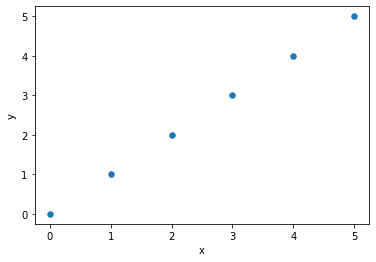

In [ ]:
plt.scatter(y, y, s=30)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Очевидно, что точки лежат на одной линии, но представим, что мы этого не знаем и нам надо определить эту линию.

Вариантов может быть достаточно много:

In [ ]:
y1 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([0, 1, 1, 10, 4, 5])
y3 = np.array([0, 1, 4, 4, 5, 5])

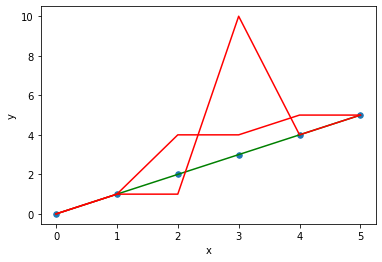

In [ ]:
plt.scatter(y, y, s=30)
plt.plot(y1, 'g')
plt.plot(y2, 'r')
plt.plot(y3, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что зеленая линия - это то, что мы хотели найти. 

Осталось доказать математичеки, что это наилучшее приближение функции (линии) к исходному набору данных (точкам).

Воспользуемся самой простой идеей и вычтем из правильных ответов предсказанные и сложим результат.

Для `y3` получим следующее:

(0-0)+(1-1)+(2-4)+(3-4)+(4-5)+(5-5) = -4

Аналогично посчитаем для `y1` и `y2`, а использование типа данных `numpy array` упростит наши вычисления:

In [ ]:
e1 = sum(y - y1)
e2 = sum(y - y2)
e3 = sum(y - y3)

print(e1)
print(e2)
print(e3)

0
-6
-4


И для получения средней ошибки для каждого объекта разделим полученное значение на число объектов.

Для `y3` получим следующее:

((0-0)+(1-1)+(2-4)+(3-4)+(4-5)+(5-5)) / 6 = -4 / 6 = -0.66

In [ ]:
e1 = sum(y - y1)/len(y)
e2 = sum(y - y2)/len(y)
e3 = sum(y - y3)/len(y)

print(e1)
print(e2)
print(e3)

0.0
-1.0
-0.6666666666666666


**Функция потерь** в машинном обучении является мерой того, насколько точно полученная модель способна предсказать целевую функцию (правильные ответы).

В рассмотренном примере: 
мы посчитали самую простую функцию потерь и получили, что 
в `y1` наиболее точные предсказания.

Функция потерь по всем объектам называется **эмпирическим риском**. Чем меньше эмпирический риск, тем точнее работает модель машинного обучения.


Только рассмотренную функцию используют редко, а вот ее небольшое видоизменение довольно таки часто: называется такая функция потерь **MAE** - mean absolute error - 
cредняя абсолютная ошибка. Это еще одна функция потерь, используемая в регрессионных моделях. 

MAE - это сумма абсолютного значения разницы  (то есть по модулю) между целевым значением и прогнозируемым значением. 
Он только измеряет среднюю длину модуля предсказанной ошибки значения, независимо от направления, и диапазон значений составляет от 0 до положительной бесконечности.

То есть, чем ближе MAE к 0, тем модель лучше.

Рассчитаем MAE для нашего примера:

In [ ]:
e1 = sum(abs(y - y1))/len(y)
e2 = sum(abs(y - y2))/len(y)
e3 = sum(abs(y - y3))/len(y)

print(e1)
print(e2)
print(e3)

0.0
1.3333333333333333
0.6666666666666666


Аналогичный функцонал есть в библиотеке `sklearn`:

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, y3)

0.6666666666666666

Рассмотрим следующий пример

## Пример 2

Сгенерируем большее количество точек, для это воспользуемся функционалом `numpy random`

Команда `np.random.rand(10, 1)` сгенерирует 10 случайных чисел со значениями 0 до 1

In [ ]:
np.random.rand(10, 1)

array([[0.89984445],
       [0.65435709],
       [0.76107974],
       [0.4546634 ],
       [0.51032297],
       [0.44049049],
       [0.3941815 ],
       [0.25895252],
       [0.90411821],
       [0.22347952]])

Команда `np.random.randn(10, 1)` сгенерирует 10 случайных чисел, среднее которых будет равно 0

In [ ]:
np.random.randn(10, 1)

array([[ 0.0616352 ],
       [-0.12105073],
       [ 0.87713122],
       [-0.12899918],
       [ 0.94563367],
       [-0.01826823],
       [ 1.74189031],
       [-0.26926341],
       [ 1.32004379],
       [ 0.4835326 ]])

Пусть нам заданы 100 точек:

In [ ]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(100, 1)
y = 1 + 5 * x + np.random.randn(100, 1)

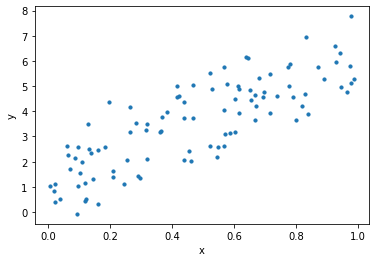

In [ ]:
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

У нас вновь может быть несколько вариантов того, как модель может выглядеть: наша задача определить, какая модель будет лучше - то есть с минимальной функцией потерь.

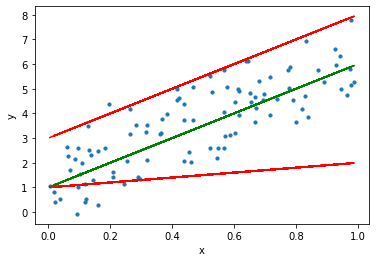

In [ ]:
y1 = 1 + 5 * x
y2 = 3 + 5 * x
y3 = 1 + 1 * x

# plot
plt.scatter(x, y, s=10)
plt.plot(x, y1, 'g')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Определим, какая модель лучше с помощью уже известной нам MAE:

In [ ]:
e1 = mean_absolute_error(y, y1)
e2 = mean_absolute_error(y, y2)
e3 = mean_absolute_error(y, y3)

print(e1)
print(e2)
print(e3)

0.8623845994287561
1.8153285514201543
2.180005707537805


Получаем, что ответы модели `y1` (зеленая линия на графике) дают минимальное значение MAE, что обозначает, что прогноз, согласно модели 1, наиболее точный.